### Purpose:

Using Descriptive Statistics, apply different calculations to measure insights such as:

+ Countries that average the highest/lowest spending
+ Countries above and below average
+ Grouping coutries by percentiles
+ More to add as the project progresses

What concepts will be practiced?

+ Estimates of Location
+ Estimates of Variability
+ Exploring Data Distribution
+ Binary and Categorical Data

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy
from scipy import stats
from scipy.stats import trim_mean
from statsmodels import robust

# reading in the csv
df = pd.read_csv('data/state_csv.csv')
df.head(5)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [2]:
# understanding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     int64  
 2   Murder.Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB


In [3]:
# rounding and transposing the basic descriptive analyics
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Population,50.0,6162876.30,6848235.35,563626.0,1833004.25,4436369.5,6680312.25,37253956.0
Murder.Rate,50.0,4.07,1.92,0.9,2.42,4.0,5.55,10.3


## Calculating Different Estimates of Location

### For the first exercise, will use the year 2016

#### Mean 
+ Sum of all values divided by the number of values

#### Median
+ (50th Percentile) The value where such value of the data is above, and the other half below

### Trimmed Mean
+ The average of all values after dropping a fixed set of extreme values

### Weighted Mean
+ The sum of all values times a weight divided by the sum of the weights

In [4]:
# renaming the column Murder.Rate to Murder Rate
df = df.rename({"Murder.Rate" : "Murder Rate"}, axis = 1)

# looking at the first five columns to also ensure the renaming also worked
df.head(5)

,State,Population,Murder Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [5]:
# calculating the average
mean_pop = round(df['Population'].mean(), 2)
mean_pop

6162876.3

In [6]:
# calculating the median
median_pop = round(df['Population'].median(), 2)
median_pop

4436369.5

In [7]:
# calculating the trimmed mean
trim_mean_pop = round(stats.trim_mean(df['Population'], 0.1),2)
trim_mean_pop

4783697.12

In [8]:
# calculating the trim mean in a different way to confirm it matches and it works
tr_mean_2 = round(trim_mean(df['Population'], 0.1), 2)
tr_mean_2

4783697.12

In [9]:
# calculating the weighted mean
weighted_mean = round(np.average(df['Murder Rate'], weights = df['Population']),2)
weighted_mean

4.45

In [10]:
import wquantiles

# calculating the weighted median
weighted_median = round(wquantiles.median(df['Murder Rate'], weights = df['Population']), 2)
weighted_median

4.4

## Estimates of Variability 

### Deviations
+ Measure that is used to find the difference betwen the observed value and the expected value of a variable. In other words, it is the distance from the centre point
+ Value - mean of the data

### Variance 
+ The sum of squared deviatons from the mean divided by n - 1 where n is the number of data values
+ Sum of deviations/(count of data values - 1)

### Standard Deviation
+ The Square Root of the Variance

### Mean Absolute Deviation
+ The mean of the absolute values of the deviations from the mean

### Percentile
+ The value such that P percent of the values take on this value or less (100-P) percent to take on this value or more

### Interquartile Range (IQR)
+ The difference between the 75th percentile and the 25th percentile

In [11]:
# calculating the standard deviation of the population

std_deviation = round(df['Population'].std(),2)
std_deviation

6848235.35

In [12]:
# calculating the interquartile range of the population

iqr = round(df['Population'].quantile(0.75) - df['Population'].quantile(0.25), 2)
iqr

4847308.0

In [13]:
# using numpy to find mean absolute deviation

data = df['Population']
mean = np.mean(data)
abs_dev = np.absolute(data - mean)
mad = round(np.mean(abs_dev), 2)
mad

4450933.36

In [14]:
# now lets use pandas .mad() to see if we get the same answer

p_mad = round(df['Population'].mad(), 2)
p_mad

4450933.36

### Percentiles

In [15]:
# percentiles of population by state

df['Population'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64

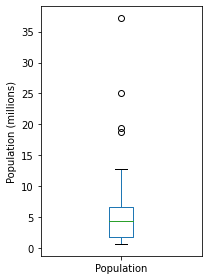

In [16]:
# creating a boxplot to visualize the distribution of population by state

ax = (df['Population']/1_000_000).plot.box(figsize=(3, 4))
ax.set_ylabel('Population (millions)')

plt.tight_layout()
plt.show();

### Key Takeaways from the Boxplot above

+ The horizontal line is the median which is close to 5 million
+ The top and bottom half of the both are the 75th and the 25th percentile
+ The line, also known as whiskers, at beginning at the start and ending at the top closer to 13 Million represent the range for the bulk of the data (excluding outliers)

### Frequency Table and Histogram

+ Divides up the variable range into equally spaced segments and tells us how many values fall within each segment
+ The function pandas.cut() creates a series that maps the values into the segment
+ Using the method value_counts() we can get the frequency tables

In [17]:
binned_population = pd.cut(df['Population'],10)
binned_population.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [18]:
binned_population.name = 'binnedpopulation'
df = pd.concat([df, binned_population], axis = 1)
df = df.sort_values(by = 'Population')

groups = []
for group, subset in df.groupby(by='binnedpopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

### Takeaways

+ The least populous state is Wyoming (Top Left) with 536,626 people 
+ The most populated state is California with 37,253,956 people
+ This gives us a range of 37,253,956 - 536,626 which gives us 36,690,330 to divide into equal size bins

### Next Steps

+ Create a visual for the frequency table above

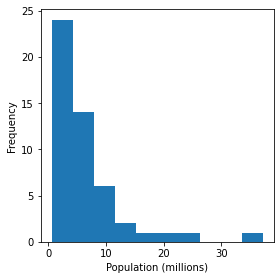

In [19]:
ax = (df['Population'] / 1_000_000).plot.hist(figsize = (4,4))
ax.set_xlabel('Population (millions)')

plt.tight_layout()
plt.show();

### Density Estimates

+ Shows the distribution of data values as a continous line
+ A density plot can be thought of as a smoothed histogram
+ Although it is typically computed directly from the data as a kernel density estimate

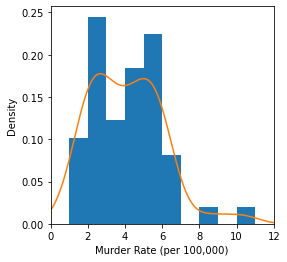

In [20]:
ax = df['Murder Rate'].plot.hist(density = True, xlim = [0,12], bins = range(1,12), figsize = (4,4))

df['Murder Rate'].plot.density(ax = ax)
ax.set_xlabel('Murder Rate (per 100,000)')
plt.show();

### Exploring Binary and Categorical Data

+ For categorical data, simple proportions or percentages tell the story of data

### Key Terms for Exploring Categorical Data

+ Mode: Most commonly occurring category or value in a dataset
+ Expected Value: When the categories are associated with a numeric value
+ Bar Charts: The frequency or proportion for each category plotted as bars
+ Pie Charts: The frequency or proportion for each category plotted as wedges in a pie

### Next Steps

+ Import airport delays per year by cause for Dallas/Fort Worth(DFW)
+ Delays are categorized as being due to factors under:

- Carrier Control
- Air Traffic Control
- Control (ATC) System Delays
- Weather Security
- Late Inbound Aircraft

In [21]:
dfw = pd.read_csv('data/airport_delays.csv')

In [22]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Carrier   1 non-null      float64
 1   ATC       1 non-null      float64
 2   Weather   1 non-null      float64
 3   Security  1 non-null      float64
 4   Inbound   1 non-null      float64
dtypes: float64(5)
memory usage: 168.0 bytes


In [23]:
print(100 * dfw / dfw.values.sum())

     Carrier        ATC   Weather  Security    Inbound
0  23.022989  30.400781  4.025214  0.122937  42.428079


### Bar Charts

+ Are a common visualization tool for displaying single categorical variables
+ Categories are listed on the x-axis and frequencies or proportions on the y-axis

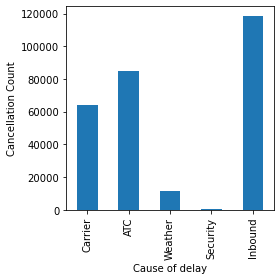

In [24]:
# tranposing the table above to create a barplot
ax = dfw.T.plot.bar(figsize=(4, 4), legend=False)

# renaming the x axis to Cause of delay
ax.set_xlabel('Cause of delay')

# renaming the y axis to Cancellation Count
ax.set_ylabel('Cancellation Count')

plt.tight_layout()
plt.show();

### Correlation

+ The process of establishing a relationship or connection between two or more measures

#### Key Terms for Correlation

+ Correlation Coefficient: A matric that measures the extext to which numeric variables are associated with one another (ranges from -1 to +1)
+ Correlation Matrix: A table where the variables are shown on both rows and columns, and the cell values are the correlations between the variables

In [25]:
# reading in sp_500 data csv
sp_data = pd.read_csv('data/sp500_data.csv', index_col = 0)

# reading in sp_sectors csv
sp_sec = pd.read_csv('data/sp500_sectors.csv')

In [26]:
# understanding the data landscape in sp_data
sp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5647 entries, 1993-01-29 to 2015-07-01
Columns: 517 entries, ADS to HSIC
dtypes: float64(517)
memory usage: 22.3+ MB


In [27]:
# understanding the data landscape in sp_sec
sp_sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sector        517 non-null    object
 1   sector_label  517 non-null    object
 2   sub_sector    517 non-null    object
 3   symbol        517 non-null    object
dtypes: object(4)
memory usage: 16.3+ KB


In [28]:
# renaming first column from Unnamed: 0 to Date
sp_data = sp_data.rename({"Unnamed: 0" : "Date"}, axis = 1)

# switching Date to datetime
# sp_data['Date'] = pd.to_datetime(sp_data['Date'])

# looking at the first five rows of the dataset to ensure it worked
sp_data.head(5)

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [29]:
# looking at the first five records of the sector dataset
sp_sec.head(5)

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [30]:
# cgetting the symbols from the sp sector csv and storing it under the variable symbols
symbols = sp_sec[sp_sec['sector'] == 'telecommunications_services']['symbol']

# filtering the data for dates July 2012 through June 2015
telecom = sp_data.loc[sp_data.index > '2012-07-01', symbols]

# using the .corr function to build a table with correlations
telecom.corr()

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


In [31]:
# now we turn our attention to the etf sector following the same steps from the table above
etfs = sp_data.loc[sp_data.index > '2012-07-01', sp_sec[sp_sec['sector'] == 'etf']['symbol']]

# looking at the table to ensure the data looks good
etfs

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.400000,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.520000,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.560000,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.800000,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.480000,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,-0.379997,-0.669998,-1.270004,-1.398679,0.010002,0.279999,-0.069999,-0.497896,-0.750000,-0.200005,-0.309997,-0.059997,-0.229999,0.189994,-0.279999,-0.220002,-0.330002
2015-06-26,-0.040001,-0.700004,-0.389999,-0.079926,0.360001,-0.020001,0.189999,-0.587512,0.259995,-0.010002,0.340000,-0.290001,-0.280002,-0.220001,0.029998,-0.030001,-0.330002
2015-06-29,-0.590000,-1.320000,-2.580002,-1.918189,0.260002,1.829999,-0.080000,-2.280327,-0.500000,-1.089996,-0.160000,-0.769996,-0.700001,-1.180000,-0.500000,-0.330000,-0.450000
2015-06-30,-0.480000,-0.419998,-1.369996,-1.168887,0.130005,0.889999,0.139999,-0.338568,-0.169998,-0.430001,-0.310001,-0.270001,0.259999,-0.510002,-0.580002,-0.150002,-0.269996


### Creating a visual for the table above

+ The table above contains a lot of rows and a lot of numbers
+ Digesting this information in the format above can be challenging for visual learners like myself
+ Using Seaborn and Matplotlib, build a heatmap to display correlations in an easier to read format

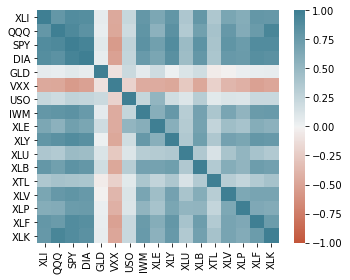

In [32]:
fig, ax = plt.subplots(figsize=(5,4))

# creating the heatmap using seaborn
ax = sns.heatmap(etfs.corr(), vmin = -1, vmax = 1, cmap = sns.diverging_palette(20, 220, as_cmap = True), ax = ax)
plt.tight_layout()
plt.show();

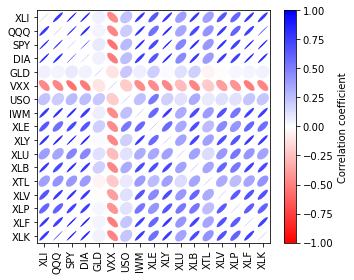

In [33]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec, ax

m, ax = plot_corr_ellipses(etfs.corr(), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(m, ax=ax)
cb.set_label('Correlation coefficient')

plt.tight_layout()
plt.show()

### Scatterplots

+ Standard way to visualize between two measured data variables
+ The X-axis represents oe variable and the Y-axis another
+ The example below shows the correlation between the daily returns for ATT and Verizon

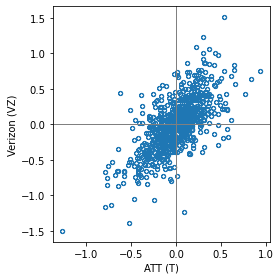

In [34]:
# create a scatter plot using the 'T' column for the x-axis and the 'VZ' column for the y-axis
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(4, 4), marker='$\u25EF$')

# set the x-axis label
ax.set_xlabel('ATT (T)')

# set the y-axis labe
ax.set_ylabel('Verizon (VZ)')

# add a horizontal line at y=0 in grey with a linewidth of 1
ax.axhline(0, color='grey', lw=1)

# add a vertical line at x=0 in grey with a linewidth of 1
ax.axvline(0, color='grey', lw=1)

# adjust the plot layout to ensure all plot elements fit within the figure
plt.tight_layout()

# display the plot
plt.show()

### Exploring Two or More Variables

#### Key Terms

+ Contingency Table: A tally count between two or more categorical variables
+ Hexagonal Binning: A plot of two numeric variables with the records binned into hexagons
+ Contour Plot: A plot showing the density of two numeric variables
+ Violin Plot: Similar to a boxplot but showing density estimate

In [35]:
kc_tax = pd.read_csv('data/kc_tax.csv')
kc_tax.sample(n = 10, random_state = 42)

,TaxAssessedValue,SqFtTotLiving,ZipCode
65868,600000.0,1710,98102.0
316806,692000.0,3240,98074.0
282740,291000.0,1670,98038.0
391787,325000.0,860,98122.0
56604,442000.0,2460,98034.0
355565,206000.0,1460,98002.0
172437,842000.0,2700,98053.0
213398,272000.0,880,98051.0
9237,428000.0,2540,98133.0
53226,636000.0,3370,98107.0


### Hexagonal Binning and Contours

+ Scatterplots are fine when there is a relatively small number of data values
+ For sets with hundreds of thousands or millions of records, a scatterplot will be too dense
+ Therefore, we need a different way to visualize the relationship
+ One way to do this is by grouping records into hexagonal bins and plotting the hexagons with a colour inidicating the number of records in that bin

In [36]:
# filtering the data using the .loc function to filter the kc tax by
# TaxAssessed value is less than 750,000
# SqFtTotLiving is greater than 100
# SqFtTotLiving is less than 3,500

kc_tax_2 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
print(kc_tax_2.shape)

(432693, 3)


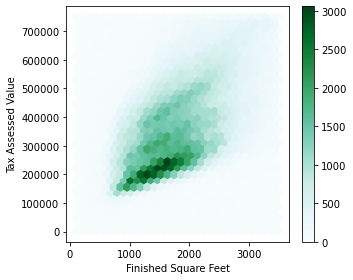

In [37]:
# creating a hexbin of the filtered data
ax = kc_tax_2.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                         gridsize=30, sharex=False, figsize=(5, 4))

# setting the x axis label
ax.set_xlabel('Finished Square Feet')

# setting the y axis label
ax.set_ylabel('Tax Assessed Value')

# adjust and display the plot
plt.tight_layout()
plt.show()

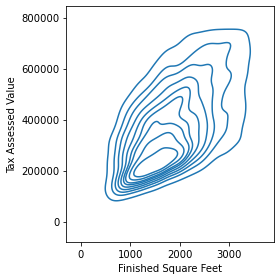

In [38]:
# creating a kernel density plot
fig, ax = plt.subplots(figsize=(4, 4))

# creating the kdeplot with the filtered data
sns.kdeplot(data = kc_tax_2.sample(10000), x ='SqFtTotLiving', y = 'TaxAssessedValue', ax = ax)

# setting the x axis 
ax.set_xlabel('Finished Square Feet')

# setting the y axis
ax.set_ylabel('Tax Assessed Value')

# adjust and display layout
plt.tight_layout()
plt.show();

### Categorical and Numerical Data

+ Boxplots are a simple way to visually compare the distributions of a numeric variable grouped according to a categorical variable

In [39]:
airline_stats = pd.read_csv('data/airline_stats.csv')
airline_stats.sample(n = 10, random_state = 42)

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
21733,19.412587,1.179487,0.041958,Southwest
7104,6.233333,3.580556,0.000000,Delta
17469,5.166667,4.516667,1.000000,American
26055,3.704467,3.872852,0.209622,Delta
17882,5.047379,5.447581,0.391633,Southwest
14358,4.545455,0.000000,0.000000,Delta
9961,7.555556,2.377778,0.488889,American
14704,4.735632,9.379310,0.000000,Jet Blue
16726,4.937500,0.987500,1.250000,Delta
2929,11.735974,1.867987,0.475248,Southwest


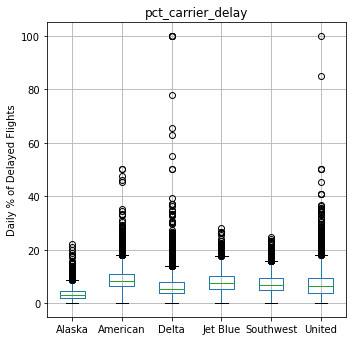

In [47]:
# Create a box plot using pandas.DataFrame.boxplot(), with the x-axis representing airline and y-axis representing percent of carrier delays
# The plot will be grouped by airline using the 'by' parameter
# The plot will be added to the current axis 'ax'
# The plot will have a size of 5x5 using the 'figsize' parameter
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay',
                           figsize=(5, 5))

# Set the x-label to an empty string using the set_xlabel() method of the axis
ax.set_xlabel('')

# Set the y-label to 'Daily % of Delayed Flights' using the set_ylabel() method of the axis
ax.set_ylabel('Daily % of Delayed Flights')

# Set the plot title to an empty string using matplotlib.pyplot.suptitle()
plt.suptitle('')

# Adjust the plot layout using matplotlib.pyplot.tight_layout() to prevent overlapping elements
plt.tight_layout()

# Display the plot using matplotlib.pyplot.show()
plt.show();

### Observations

+ Alaska stands out as having the fewest delays, while America has the most delays
+ The lower quartile for American is higher than the upper quartile for Alaska
+ Violin plot is an enhancement to the boxplot and plots the density estimate on the y-axis

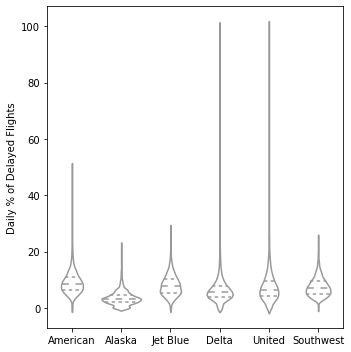

In [41]:
# Create a new figure and subplot of size 5x5 using matplotlib.pyplot.subplots()
fig, ax = plt.subplots(figsize=(5, 5))

# Create a violin plot using seaborn.violinplot(), with the x-axis representing airline and y-axis representing percent of carrier delays
# The plot will be added to the previously created subplot using the ax parameter
# The inner parameter set to 'quartile' will show the quartile range of the data within the violin plot
# The color parameter set to 'white' will make the plot background white
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay',
               ax=ax, inner='quartile', color='white')

# Set the x-label to an empty string using the set_xlabel() method of the subplot axis
ax.set_xlabel('')

# Set the y-label to 'Daily % of Delayed Flights' using the set_ylabel() method of the subplot axis
ax.set_ylabel('Daily % of Delayed Flights')

# Adjust the subplot layout using matplotlib.pyplot.tight_layout() to prevent overlapping elements
plt.tight_layout()

# Display the plot using matplotlib.pyplot.show()
plt.show();

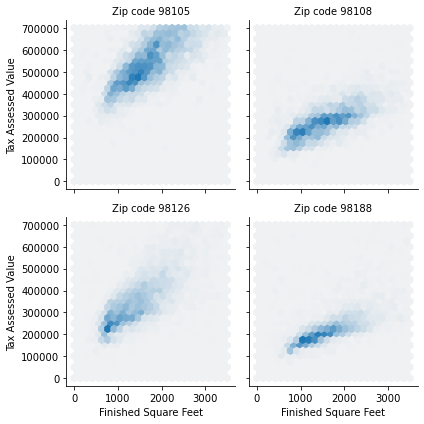

In [48]:
# Define a list of zip codes to filter the data by
zip_codes = [98188, 98105, 98108, 98126]

# Create a new DataFrame 'kc_tax_zip' by filtering kc_tax_2 to only include rows where the 'ZipCode' column matches one of the zip codes in the 'zip_codes' list
kc_tax_zip = kc_tax_2.loc[kc_tax_2.ZipCode.isin(zip_codes),:]

# Define a function 'hexbin' that creates a hexagonal bin plot of two variables 'x' and 'y', colored by 'color'
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=25, cmap=cmap, **kwargs)

# Create a FacetGrid plot using seaborn.FacetGrid(), with each plot corresponding to a unique zip code in the 'ZipCode' column of the 'kc_tax_zip' DataFrame
# The plot will have two columns using the 'col_wrap' parameter
g = sns.FacetGrid(kc_tax_zip, col='ZipCode', col_wrap=2)

# Apply the 'hexbin' function to the 'SqFtTotLiving' and 'TaxAssessedValue' columns of the 'kc_tax_zip' DataFrame using FacetGrid.map()
# The 'extent' parameter sets the x and y limits of the plot
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue', extent=[0, 3500, 0, 700000])

# Set the x-label and y-label of each plot using FacetGrid.set_axis_labels()
g.set_axis_labels('Finished Square Feet', 'Tax Assessed Value')

# Set the title of each plot using FacetGrid.set_titles()
# The 'col_name' variable corresponds to the name of the column that the plot is being created for (i.e. the zip code)
g.set_titles('Zip code {col_name:.0f}')

# Adjust the plot layout using matplotlib.pyplot.tight_layout() to prevent overlapping elements
plt.tight_layout()

# Display the plot using matplotlib.pyplot.show()
plt.show();